# Objective

In April of 2015 the 7.8 magnitude Gorkha earthquake occured near the Gorkha district of Gandaki Pradesh, Nepal. Almost 9,000 lives were lost, millions of people were instantly made homeless, and $10 billion in damages––about half of Nepal's nominal GDP––were incurred. In the years since, the Nepalese government has worked intensely to help rebuild the affected districts' infrastructures. Throughout this process, the National Planning Commission, along with Kathmandu Living Labs and the Central Bureau of Statistics, has generated, One of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

Our goal is to predict the level of damage a building suffered as a result of the 2015 earthquake. The data comes from the 2015 Nepal Earthquake Open Data Portal, and mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

## Library Imports

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using the Path to get the location of datasets
DATA_DIR = Path('..', '..', '..', 'LargeDatasets', 'DrivenData', 'Richters')
DATA_DIR

PosixPath('../../../LargeDatasets/DrivenData/Richters')

## Load the dataset and validate the dataload

In [4]:
# Load both the training features and training labels

train_features = pd.read_csv(DATA_DIR/'training_set_values.csv', index_col='id')
train_labels = pd.read_csv(DATA_DIR/'training_set_labels.csv', index_col='id')

In [5]:
# Check few initial rows of the dataset
train_features.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [6]:
train_labels.head(3)

,status_group
id,
69572,functional
8776,functional
34310,functional


In [7]:
# Check the structure of the features
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [8]:
# Check for missing values
train_features.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Data Exploration and Visualization

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


<AxesSubplot:xlabel='status_group', ylabel='count'>

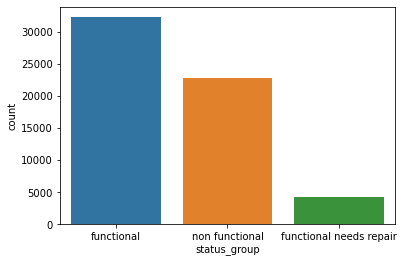

In [16]:
# Explore the target variable

print(train_labels['status_group'].value_counts())
sns.countplot(x='status_group', data=train_labels)

In [26]:
# We will explore a subset of features for the predictive modelling

selected_train_features = train_features[['amount_tsh', 'date_recorded', 'gps_height']]


,amount_tsh,date_recorded
id,,
69572,6000.0,2011-03-14
8776,0.0,2013-03-06
34310,25.0,2013-02-25
67743,0.0,2013-01-28
19728,0.0,2011-07-13
